<a href="https://colab.research.google.com/github/AgarwalMayank2/Face_Detection/blob/Clustering_Deb/applying_ML_algorithms/Clustering_PRMLproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task : Identify Face in image using clustering algorithm
dataset : using processed dataset

we extracted CNN(ResNet), HoG, LBP features and made these processed datasets

processed datasets : https://github.com/AgarwalMayank2/Face_Detection/tree/main/processed_dataset


# Clustering on CNN features

## Loading filtered_CNN_features_dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
url_filtered_CNN_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_CNN_features_dataset.csv' #for CNN limited
df_CNN = pd.read_csv(url_filtered_CNN_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv
df_CNN = df_CNN.drop(df_CNN.columns[0], axis=1)
df_CNN.columns = range(df_CNN.shape[1])
df_CNN

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.266585,1.337187,1.352905,0.100848,1.880685,0.059888,2.773605,0.115643,0.138749,0.056121,...,0.039434,0.071662,0.733759,1.643910,0.041306,1.488236,0.048181,0.247783,0.300232,Paul_Bremer
1,0.355948,0.750634,0.909794,0.188214,0.680066,0.221442,3.089571,0.342022,0.087186,0.234741,...,0.093867,0.089694,0.859610,1.764073,0.250430,1.133540,0.004091,0.153542,0.236034,Paul_Bremer
2,0.267111,1.015316,1.154480,0.131544,1.066389,0.024949,3.701925,0.145037,0.082419,0.253356,...,0.080086,0.089589,0.663708,1.854499,0.078751,1.240009,0.065222,0.105058,0.227633,Paul_Bremer
3,0.260295,0.882900,0.885955,0.106698,2.663052,0.057836,1.854394,0.209269,0.103750,0.149302,...,0.181255,0.182038,0.397535,1.222931,0.007285,0.878194,0.016247,0.110492,0.129523,Paul_Bremer
4,0.347203,0.623839,0.817085,0.212599,1.026321,0.176634,2.486715,0.426571,0.345026,0.375072,...,0.267895,0.136346,0.713298,0.978184,0.059828,1.008205,0.042905,0.028597,0.199120,Paul_Bremer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,0.110671,0.933532,1.576373,0.047225,0.697608,0.100375,2.509764,0.342827,0.115562,1.093016,...,0.161235,0.646160,0.615094,1.555704,0.093572,0.744401,0.186377,0.036658,0.164960,Charles_Moose
4320,0.250879,1.126343,0.961169,0.032000,0.247225,0.064331,2.297021,0.689515,0.502984,0.706359,...,0.322805,0.402172,0.624546,1.822085,0.377166,0.638106,0.105163,0.089668,0.067495,Charles_Moose
4321,0.101699,1.497757,0.805623,0.210569,1.158021,0.287555,1.315162,0.545735,0.269730,0.630467,...,0.252010,0.129211,1.347581,1.599726,0.049081,2.030167,0.162992,0.033966,0.037959,Charles_Moose
4322,0.108061,0.696727,1.336171,0.016554,0.625865,0.380914,2.106623,0.466441,0.081740,1.208193,...,0.168940,0.217983,0.425700,1.362742,0.245273,0.682824,0.271875,0.023275,0.111986,Charles_Moose


Splitting dataframe into train and test in 4:1 ratio

In [3]:
# Separate features and labels
X = df_CNN.iloc[:, :-1]
y = df_CNN.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_CNN, X_test_CNN, y_train_CNN, y_test_CNN = train_test_split(X, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_CNN = scaler.fit_transform(X_train_CNN)
X_test_CNN = scaler.transform(X_test_CNN)

print(f"Dataset size: {df_CNN.shape}")
print(f"Training size: {X_train_CNN.shape}, Testing size: {X_test_CNN.shape}")

Dataset size: (4324, 2049)
Training size: (3459, 2048), Testing size: (865, 2048)


## Function of algorithm

In [4]:
import random
import numpy as np
class KMeans:
  def __init__(self , n_clusters=2,max_iter=100):
    self.n_clusters =n_clusters
    self.max_iter=max_iter
    self.centroids=None
  def fit_predict(self,X):
    random_index=random.sample(range(0,X.shape[0]),self.n_clusters)
    self.centroids = X[random_index]

    for i in range(self.max_iter):
      cluster_group = self.assign_clusters(X)
      old_centroids = self.centroids
      self.centroids=self.move_centroids(X,cluster_group)
      if (old_centroids == self.centroids).all():
        break
    return cluster_group
  def assign_clusters(self,X):
    cluster_group = []
    distances = []
    for row in X:
      for centroid in self.centroids:
          distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
      min_distance = min(distances)
      index_pos = distances.index(min_distance)
      cluster_group.append(index_pos)
      distances.clear()

    return np.array(cluster_group)
  def move_centroids(self,X,cluster_group):
    new_centroids = []
    cluster_type = np.unique(cluster_group)
    for type in cluster_type:
      new_centroids.append(X[cluster_group == type].mean(axis=0))
    return np.array(new_centroids)

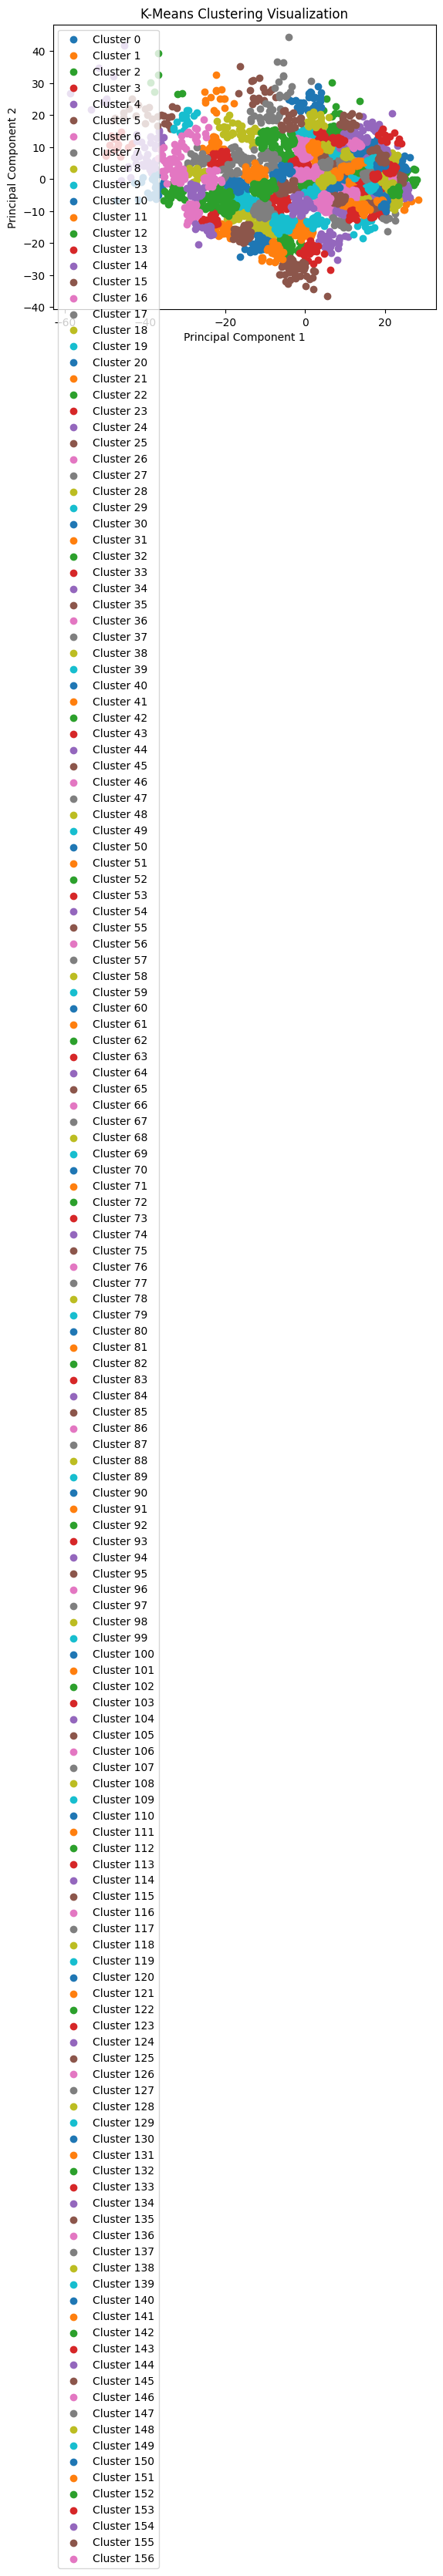

In [5]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_CNN)
km= KMeans(n_clusters=157,max_iter=100)
y_means = km.fit_predict(X_train_2D)
import matplotlib.pyplot as plt

# Plot each cluster with a different color
for cluster in range(157):  # Adjust range for the number of clusters
    plt.scatter(
        X_train_2D[y_means == cluster, 0],
        X_train_2D[y_means == cluster, 1],
        label=f'Cluster {cluster}'
    )

# Add title and legend
plt.title("K-Means Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()